In [10]:
import pandas as pd

In [11]:
df = pd.read_excel("IMDB TV show Rating.xlsx")

In [12]:
print("First few rows of the DataFrame:")
print(df.head())

First few rows of the DataFrame:
   Show Rank         Show Name Year of Release          Rating
0          1      Breaking Bad       2008–2013  9.5 (2.1M)Rate
1          2   Planet Earth II            2016  9.5 (158K)Rate
2          3      Planet Earth            2006  9.4 (220K)Rate
3          4  Band of Brothers            2001  9.4 (527K)Rate
4          5         Chernobyl            2019  9.3 (865K)Rate


In [13]:
print("\nDescriptive statistics:")
print(df.describe())



Descriptive statistics:
        Show Rank
count  250.000000
mean   125.500000
std     72.312977
min      1.000000
25%     63.250000
50%    125.500000
75%    187.750000
max    250.000000


In [14]:
import matplotlib.pyplot as plt

# Extract the year from "Year of Release" column

In [15]:
df['Year of Release'] = df['Year of Release'].str.extract(r'(\d{4})')
df['Year of Release'] = df['Year of Release'].astype(int)

# Extract the number of viewers from the "Rating" column

In [19]:
df['Number of Viewers'] = df['Rating'].str.extract(r'\((\d+[KM]?)\)')
df['Number of Viewers'] = df['Number of Viewers'].str.replace('K', '000').str.replace('M', '000000').astype(float)


# Aggregate data by year and sum up the number of viewers for each year

In [20]:
viewers_by_year = df.groupby('Year of Release')['Number of Viewers'].sum().reset_index()

# Visualize the total number of viewers by year

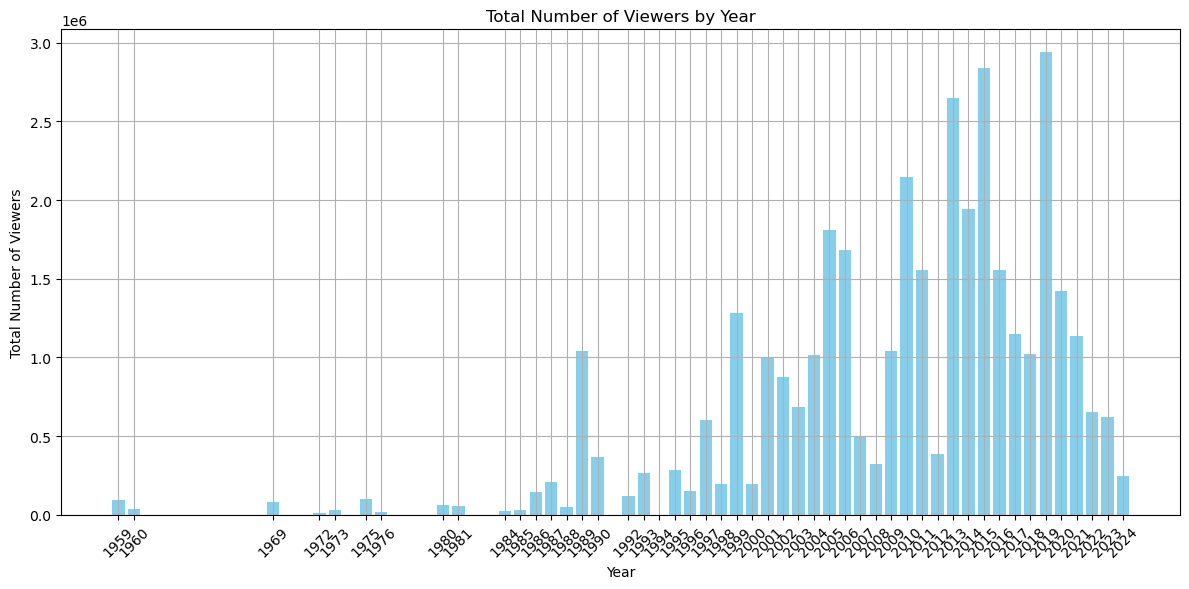

In [22]:
plt.figure(figsize=(12, 6))
plt.bar(viewers_by_year['Year of Release'], viewers_by_year['Number of Viewers'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Total Number of Viewers')
plt.title('Total Number of Viewers by Year')
plt.grid(True)
plt.xticks(viewers_by_year['Year of Release'], rotation=45)
plt.tight_layout()
plt.show()